In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [14]:
podcasts_segments = np.load('podcast_segmented.npy')
ads_segments = np.load('adBinary_segmented.npy')

X_train, X_test, y_train, y_test = train_test_split(np.array(podcasts_segments),
                                                    np.array(ads_segments),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)

(198601, 128, 10)
(48909, 128, 10)
(48910, 128, 10)
(198601, 128, 10, 1)


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 8, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 4, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 2, 64)         18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7808)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                499776    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 518,657
Trainable params: 518,657
Non-trainable params: 0
________________________________________________

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')
              
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))


Epoch 1/10
6207/6207 [==============================] - 110s 18ms/step - loss: 5.5425 - accuracy: 0.6406 - val_loss: 5.5539 - val_accuracy: 0.6399
Epoch 2/10
6207/6207 [==============================] - 101s 16ms/step - loss: 5.5422 - accuracy: 0.6407 - val_loss: 5.5539 - val_accuracy: 0.6399
Epoch 3/10
6207/6207 [==============================] - 99s 16ms/step - loss: 5.5422 - accuracy: 0.6407 - val_loss: 5.5539 - val_accuracy: 0.6399
Epoch 4/10
6207/6207 [==============================] - 99s 16ms/step - loss: 5.5423 - accuracy: 0.6407 - val_loss: 5.5539 - val_accuracy: 0.6399
Epoch 5/10
1662/6207 [=======>......................] - ETA: 1:11 - loss: 5.4793 - accuracy: 0.6448

KeyboardInterrupt: 

1529/1529 - 3s - loss: 0.6833 - accuracy: 0.8766


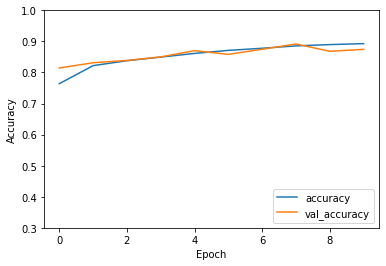

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)